<h1>WGU D209 TASK 2 REV 1 - MATTINSON</h1>

<div style="text-align: center; 
    line-height: 48px;
    font-size: 24px; " >  
    Classification Tree - Telecom Churn Data<br>
    Mike Mattinson<br>
    Master of Science, Data Analytics, WGU.edu<br>
    Task 2 - Decision Classification Tree<br>
    November 15, 2021<br>
</div>

<div style="font-family:Impact;">Configure Notebook.<span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Import and configure packages. All of the code for importing and configuring is contained in a imports .PY file. Also, there is a second helpers .PY file to define a few functions used throughout this notebook.</span></div>

In [3]:
# import and configure packages
from imports import *
%matplotlib inline
warnings.filterwarnings('ignore')

In [4]:
from helpers import *

<h2>Part I: Research Question</h2>A.  Describe the purpose of this data mining report by doing the following:

<h3>A1. Propose <b>one</b> question relevant to a real-world organizational situation that you will answer using one of the following prediction methods: (a) decision trees, (b) random forests or (c) advanced regression (i.e., lasso or ridge regression)</h3>

<div style="font-family:Impact;">Primary Question. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">A telecomm company is concerned about customer churn. It has collected customer data on 10,000 customers and the analysis will attempt to determine if the target value 'Churn', which is a yes-nop categorical variable, if 'Churn' can be predicted accurately using only a minimum number of predictor variables. The prediction analysis will use the DecisionClassificationTree to predict the target value.</span></div>

<h3>A2. Define <b>one</b> goal of the data analysis. Ensure that your goal is reasonable within the scope of the scenario and is represented in the available data.</h3>

<div style="font-family:Impact;">Primary Goal. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Primary goals will look at all predictor variables and then reduce the number of predictor variables while maintaining a reasonable level of accuracy. The company provided data will be split into training and testing data, 70% training and 30% testing. I will using the confusion matrix to show the total number of correct and incorrect predictions in the training and testing datasets.</span></div>

<h2>Part II: Method Justification</h2>B.  Explain the reasons for your chosen predictionf method from part A1 by doing the following:

<h3>B1. Explain how the prediction method you chose analyzes the selected data set. Include expected outcomes.</h3>

<div style="font-family:Impact;">Explain Method. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">I choose to use the DecisionClassificationTree to model the data in order to predict the target value using a minimum number of features. Once the model is trained using 70% of the data, then I will calculate the accuracy of the model. If the model is doing well, anyone will be able to enter the model with unclassified data and the model will accurately predict the target value.</span></div> 

<h3>B2. Summarize <b>one</b> assumption of the chosen predition method.</h3>

<div style="font-family:Impact;">One Assumption. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">The model is created using the training data and the size of the training data is sufficient large to make the best decision points throughout the tree.</span></div>

<h3>B3. List the packages or libraries you have chosen for <b>Python</b> or R, and justify how each item on the list supports the analysis.</h3>

<span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">All of the Python packages required for this analysis were loaded at the very top of th notebook. The packages and version numbers are presented. Besides the normal Python packages (numpy, scipy, matplotlib, pandas, etc.) the primary package required to create and view the prediction model comes from sklearn. Also, I use two  (2) .PY files instead of including all that code in this notebook, I reuse it in other notebooks. Imports.py has all of the required packages and Helpers.py has many helpful functions that allow me to standardize my tables, figures and other parts of the notebook. Both of these .PY files will be included with the notebook for reference.</span></div>

<h2>Part III: Data Preparation</h2>C.  Perform data preparation for the chosen data set by doing the following:

<h3>C1. Describe <b>one</b> data preprocessing goal relevant to the prediction method from part A1.</h3>

<div style="font-family:Impact;">Goal. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">The data provided by the company includes both numeric and categoricald data, the first primary goal will be to convert the categorical data into data that the model can understand. I plan to convert the categorical data using the sklearn.preprocessing LabelEncoder. This will happen in section 'C3' below.</span></div>

<h3>C2. Identify the initial data set variables that you will use to perform the analysis for the classification question from part A1, and classify each variable as continuous or categorical.</h3>

<div style= "font-weight: bold;font-size: large;border-top: solid;text-transform: uppercase;">TABLE 3-1.<span style="font-weight: normal;">DESCRIPTION OF DATA IN TELECO CHURN DATASET</span></div>

In [5]:
# load data from .csv
raw = pd.read_csv('data/churn_clean.csv')
raw = raw.drop(columns=['CaseOrder','UID',
        'Customer_id','Interaction',
        'City', 'State','County','Zip',
        'Lat','Lng','Job','TimeZone'])

<div style= "font-weight: bold;font-size: large;border-top: solid;text-transform: uppercase;">TABLE 3-2.<span style="font-weight: normal;">RAW DATA</span></div>Initial state of dataset before any manipulations.

In [6]:
saveTable(data=raw, title='RAW', sect='C2', 
    course='D209', task='Task2', caption='3 2')

,0,1,2,3
Population,38,10446,3735,13863
Area,Urban,Urban,Urban,Suburban
Children,0,1,4,1
Age,68,27,50,48
Income,28561.99,21704.77,9609.57,18925.23
Marital,Widowed,Married,Widowed,Married
Gender,Male,Female,Female,Male
Churn,No,Yes,No,No
Outage_sec_perweek,7.978,11.699,10.753,14.914
Email,10,12,9,15


shape: (10000, 38)
Table saved to: TABLES/D209_TASK2_C2_TAB_3_2_RAW.CSV


<h3>C3. Explain each of the steps used to prepare the data for the analysis. Identify the code segment for each step.</h3>

<div style="font-family: 'Impact';">Step 1.</div>The company data has already been cleaned and prepared. The only step required prior to creating the prediction model is to encode the categorical data. So, the raw data will be copied and then the clean data will encode all of the categorical data. The clean data will have all of the original variables but for example, all of the categorical data will have integer numbers representing the raw data, Area = 2 indicates Area=Rural in the raw data, etc.

In [7]:
# start with a copy of raw data
clean = raw.copy()

In [8]:
# define target and features
target = 'Churn'
X = clean.drop(columns=[target])
y = clean[target]
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [9]:
# define categorical features
cat_features = X.select_dtypes(include=['object']).columns
print(cat_features)

Index(['Area', 'Marital', 'Gender', 'Techie', 'Contract', 'Port_modem',
       'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [10]:
# define numerical features
num_features = X.select_dtypes(exclude=['object']).columns
print(num_features)

Index(['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')


In [11]:
from sklearn.preprocessing import LabelEncoder
categorical_feature_names = []
label_encoders = {}
for categorical in cat_features:
    label_encoders[categorical] = LabelEncoder()
    clean[categorical] = label_encoders[categorical].fit_transform(clean[categorical])
    names = label_encoders[categorical].classes_.tolist()
    print('Label encoder %s - values: %s' % (categorical, names))
    if categorical == target:
        continue
    categorical_feature_names.extend([categorical + '_' + str(name) for name in names])

Label encoder Area - values: ['Rural', 'Suburban', 'Urban']
Label encoder Marital - values: ['Divorced', 'Married', 'Never Married', 'Separated', 'Widowed']
Label encoder Gender - values: ['Female', 'Male', 'Nonbinary']
Label encoder Techie - values: ['No', 'Yes']
Label encoder Contract - values: ['Month-to-month', 'One year', 'Two Year']
Label encoder Port_modem - values: ['No', 'Yes']
Label encoder Tablet - values: ['No', 'Yes']
Label encoder InternetService - values: ['DSL', 'Fiber Optic', 'None']
Label encoder Phone - values: ['No', 'Yes']
Label encoder Multiple - values: ['No', 'Yes']
Label encoder OnlineSecurity - values: ['No', 'Yes']
Label encoder OnlineBackup - values: ['No', 'Yes']
Label encoder DeviceProtection - values: ['No', 'Yes']
Label encoder TechSupport - values: ['No', 'Yes']
Label encoder StreamingTV - values: ['No', 'Yes']
Label encoder StreamingMovies - values: ['No', 'Yes']
Label encoder PaperlessBilling - values: ['No', 'Yes']
Label encoder PaymentMethod - value

In [12]:
print(categorical_feature_names)
print(label_encoders)

['Area_Rural', 'Area_Suburban', 'Area_Urban', 'Marital_Divorced', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Gender_Female', 'Gender_Male', 'Gender_Nonbinary', 'Techie_No', 'Techie_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two Year', 'Port_modem_No', 'Port_modem_Yes', 'Tablet_No', 'Tablet_Yes', 'InternetService_DSL', 'InternetService_Fiber Optic', 'InternetService_None', 'Phone_No', 'Phone_Yes', 'Multiple_No', 'Multiple_Yes', 'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Bank Transfer(automatic)', 'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check']
{'Area': LabelEncoder(), 'Marital': LabelEncoder(), 'Gender': La

<h3>C4. Provide Clean Data</h3>Provide a copy of the cleaned data set.

<div style= "font-weight: bold;font-size: large;border-top: solid;text-transform: uppercase;">TABLE 3-3.<span style="font-weight: normal;">CLEAN DATA</span></div>

In [13]:
#clean = raw.copy()
saveTable(data=clean, title='CLEAN', sect='C4', 
    course='D209', caption='3 3', task='Task2')

,0,1,2,3
Population,38,10446,3735,13863
Area,2,2,2,1
Children,0,1,4,1
Age,68,27,50,48
Income,28561.99,21704.77,9609.57,18925.23
Marital,4,1,4,1
Gender,1,0,0,1
Churn,No,Yes,No,No
Outage_sec_perweek,7.978,11.699,10.753,14.914
Email,10,12,9,15


shape: (10000, 38)
Table saved to: TABLES/D209_TASK2_C4_TAB_3_3_CLEAN.CSV


<h2>Part IV Analysis</h2>D.  Perform the data analysis and report on the results by doing the following:

<h3>D1. Split the data into training and test data sets and provide the file(s).</h3>

In [14]:
# define primary feature and target data
target= 'Churn' # target data
X = clean.loc[:, clean.columns != target]
y = clean.loc[:, clean.columns == target]

In [15]:
# train test split raw data
tts = train_test_split(X, y, test_size=0.3, random_state=13)
(X_train, X_test, y_train, y_test)=tts
print('X_train: {}'.format(X_train.shape))
print('y_train: {}'.format(y_train.shape))
print('X_test: {}'.format(X_test.shape))
print('y_test: {}'.format(y_test.shape))

X_train: (7000, 37)
y_train: (7000, 1)
X_test: (3000, 37)
y_test: (3000, 1)


<div style= "font-weight: bold;font-size: large;border-top: solid;text-transform: uppercase;">TABLE 4-1.<span style="font-weight: normal;">TRAINING DATA</span></div>

In [16]:
saveTable(data=X_train.merge(y_train, 
        left_index=True, right_index=True),
    title='TRAIN', sect='D1', 
    course='D209', caption='4 1', task='Task2')

,4847,9992,4621,5774
Population,48905,4261,10218,54601
Area,0,1,2,2
Children,0,1,1,4
Age,63,18,27,41
Income,27506.01,35876.21,43148.68,35600.06
Marital,1,0,1,3
Gender,1,1,0,0
Outage_sec_perweek,10.455,9.213,10.526,11.035
Email,14,15,9,17
Contacts,1,2,0,0


shape: (7000, 38)
Table saved to: TABLES/D209_TASK2_D1_TAB_4_1_TRAIN.CSV


<div style= "font-weight: bold;font-size: large;border-top: solid;text-transform: uppercase;">TABLE 4-2.<span style="font-weight: normal;">TEST DATA</span></div>

In [17]:
saveTable(data=X_test.merge(y_test, 
        left_index=True, right_index=True),
    title='TEST', sect='D1', 
    course='D209', caption='4 2', task='Task2')

,5952,1783,4811,145
Population,6399,32000,18951,5157
Area,2,1,2,0
Children,4,4,1,8
Age,59,83,68,75
Income,36343.28,40031.03,39053.35,36342.31
Marital,2,4,2,0
Gender,1,0,0,1
Outage_sec_perweek,8.923,14.75,11.206,15.409
Email,13,10,10,15
Contacts,0,2,7,2


shape: (3000, 38)
Table saved to: TABLES/D209_TASK2_D1_TAB_4_2_TEST.CSV


<h3>D2. Describe the analysis technique you used to appropriately analyze the data. Include screenshots of the intermediate calculations you performed.</h3>

<span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">The data for the model is the training data created above in section 'D1'. I am selected max_depth=2 for the model in order to create a simple model. I want to be able to create a 2D decision boundary plot using a scatter plot.</span>

In [18]:
# create model
dt = DecisionTreeClassifier(max_depth=2, random_state=13)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

<div style= "font-weight: bold;font-size: large;border-top: solid;text-transform: uppercase;">FIGURE 4-1.<span style="font-weight: normal;">CLASSIFICATION TREE (MAX_DEPTH=2)</span></div>

Target: [Churn: No, Yes]


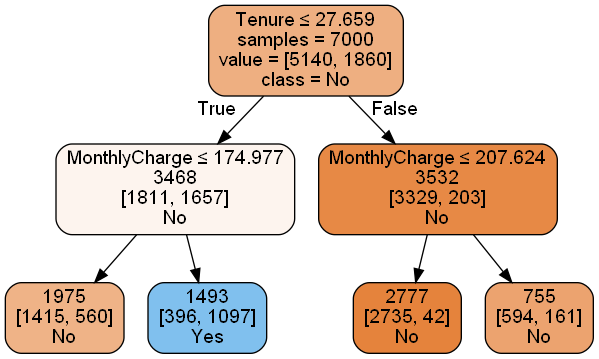

In [19]:
print('Target: [{}: {}]'.format(target, ', '.join(dt.classes_)))
plotDecisionTree(dt, feature_names=X_train.columns.to_list(),
            class_names=dt.classes_)

<div style= "font-weight: bold;font-size: large;border-top: solid;text-transform: uppercase;">FIGURE 4-2.<span style="font-weight: normal;">DECISION BOUNDARIES </span></div>

Figure saved to: FIGURES/D209_TASK2_D2_FIG_4_2_DECISION_BOUNDARIES.PNG


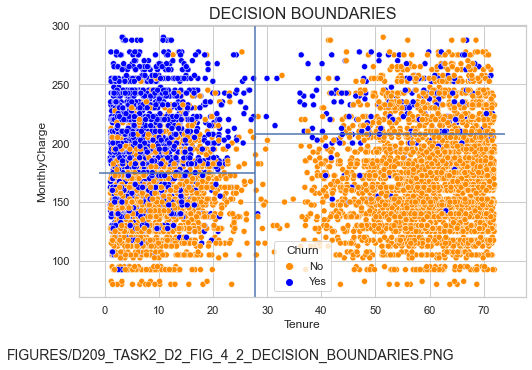

In [20]:
# plot decision boundaries
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)

# define plot variables
x = 'Tenure'
y='MonthlyCharge'
title = 'Decision Boundaries'

sns.scatterplot(x=x, y=y,
    palette=['darkorange','blue'], hue=target,
    data=y_train.merge(X_train, left_index=True, right_index=True))
ax.axvline(x=27.659)
ax.hlines(y=174.977, xmin=-1, xmax=27.659) # horizontal line segment
ax.hlines(y=207.624, xmin=27.659, xmax=74) # horizontal line segment

ax.set_title(title.upper(), fontsize=16)

# create filename and save
f=getFilename(title=title, caption='4 2',
              course='D209', task='Task2', sect='D2',
              ftype='PNG', subfolder='figures')
plt.gcf().text(0, -.05, f, fontsize=14)
fig.savefig(f, dpi=150, bbox_inches='tight') 
print('Figure saved to: {}'.format(f)) # feedback to notebook

<span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">The figure above shows the model from another slightly different vantage point. The scatter plot of the two key predictive features is broken down into four (4) section correlating to the four (4) terminal nodes of the decision tree. Each of the vertical and horizontal line segments are created using the numbers shown in the decision tree decision nodes.</span>

<h3>D3. Provide the code used to perform the classification analysis from part D2.</h3>

<div style="font-family:Impact;">Code. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">All code and output is contained within this Jupyter notebook. The notebook file is called <b>D209_2_x.ipynb</b> and the associated PDF version is called <b>D209_2_x - Jupyter Notebook.pdf</b>.</span></div>

<h2>Part V: Data Summary and Implications</h2>

<h3>E1. Explain the accuracy and the mean squared error (MSE) of your prediction model.</h3>

<span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">For the classification tree, the measurement of accuracy is found within the confusiion matrix. Below are the confusion matrices for training data (showing 83.44% accuracy) and the test data (showing 83.57% accuracy). The accuracy is calculated by adding the number of True Positives and True Negatives on the diagonal, then divide that number by the total number of records.</span>

In [ ]:
# training summary
classificationSummary(y_train, dt.predict(X_train))

In [ ]:
# test summary
classificationSummary(y_test, dt.predict(X_test))

<h3>E2. Discuss the results and implications of your prediction analysis.</h3>

<span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">The final prediction model uses only two (2) of the original features to predict the target class, and it does it correctly 83% of the time, pretty accurate for such a simple model. The simple model and graphical tree will be easy to explain to those individuals who will be using this prediction model. </span>

<h3>E3. Discuss <b>one</b> limitation of your data analysis.</h3>

<div style="font-family:Impact;">Limitations. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">One limitation of the predictive analysis is that it correctly predicts target class only 83% of the time, that is, there is the 17% chance that the predicted class is incorrect.</span></div>

<h3>E4. Recommend a course of action for the real-world organizational situation from part A1 based on your results and implications discussed in part E2.</h3>

<div style="font-family:Impact;">Recommendations. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Recommend that company include policy to include the churn prediction for all customers at intervals during the lifespan of the customer with the company, for example, during the first month, then again a 1-3 monthly intervals. Also, the prediction can be used anytime the customer's MonthlyCharge changes. Lastly, the company can have a 'Customer Support' office reachout to customer's with Churned predicted, possibly lowering their current monthly charge by some calculated amount.</span></div>

<h2>Part VI: Demonstration</h2>

<h3>F. Provide a Panopto video recording that includes a demonstration of the functionality of the code used for the analysis and a summary of the programming environment.</h3>

<div style="font-family:Impact;">Video. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Panapto video was created and is located at: <a href="https://wgu.edu" target="_blank" rel="noopner noreferrer">https://wgu.edu</a></span></div>

<h3>G. Record the web sources used to acquire data or segments of third-party code to support the analysis. Ensure the web sources are reliable.</h3>

<div style="font-family:Impact;">Configure Scrollbars. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Disable scrollbars in notebook.</span></div>

In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<div style="font-family:Impact;">Disable Auto Scroll. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Disable automatically scroll to bottom.</span></div>

In [ ]:
%%javascript
require("notebook/js/notebook").Notebook.prototype.scroll_to_bottom = function () {}

<div style="font-family:Impact;">Toggle Notebook Warnings. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Use the following code to toggle warning messages in the notebook. Another piece of code courtesy of stackoverflow (2021). </span></div><a href="https://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython" target="_blank" rel="">https://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython</a>

In [ ]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

<div style="font-family:Impact;">Terminal List Files. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">List all of the  files from the current working directory. </span></div>Ref: (1) <a href="https://www.youtube.com/watch?v=C8MT-A7Mvk4&ab_channel=KimberlyFessel" target="_blank" rel="https://www.youtube.com/watch?v=C8MT-A7Mvk4&ab_channel=KimberlyFessel">Fessel, K. (2021). How to save a matplotlib figure and fix text cutting off || Matplotlib Tips</a> Retrieved from https://www.youtube.com/watch?v=C8MT-A7Mvk4&ab_channel=KimberlyFessel

In [ ]:
!ls

In [ ]:
!du -h *.*

<div style="font-family:Impact;">List Installed Packages. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">List of all installed PIP packages and the versions.</span></div>Ref: (1) https://pip.pypa.io/en/stable/cli/pip_list/

<div style="font-family:Impact;">Update Package. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Update a specific package within notebook.</div>Ref: (1) https://stackoverflow.com/questions/54453219/why-can-i-see-pip-list-sklearn-but-not-in-jupyter-when-i-run-a-code

In [ ]:
!python -m pip install -U scikit-learn

<div style="font-family:Impact;">Merget Two Dataframes. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Code to merge two dataframes.</span></div>Ref: (1) https://stackoverflow.com/questions/26265819/how-to-merge-a-series-and-dataframe

In [ ]:
# merge X and y back together, for example
d = X.merge(y, left_index=True, right_index=True)
display(d.head())

<div style="font-family:Impact;">List .index() Function. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">The .index() method returns the index of the specified element in the list. </span></div>Ref: (1) https://www.programiz.com/python-programming/methods/list/index

In [ ]:
animals = ['cat', 'dog', 'rabbit', 'horse']
# get the index of 'dog'
index = animals.index('dog')
print(index)

<div style="font-family:Impact;">Row Index Names in Pandas. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Code to get rows/index names in a Pandas dataframe. </span></div>Ref: (1) https://www.geeksforgeeks.org/how-to-get-rows-index-names-in-pandas-dataframe/

In [ ]:
# making data frame 
data = cleanData
  
# calling head() method  
# storing in new variable 
data_top = data.head() 
    
# iterating the columns
for row in data_top.index:
    print(row, end = " ")

<div style="font-family:Impact;">Tutorial Python Subplots. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">Tutorial: Python Subplots </span></div>Ref: (1) https://www.kaggle.com/asimislam/tutorial-python-subplots

In [ ]:
#  Categorical Data
heart_CAT = ['Churn']

#  Categorical Data
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,10))

for i in heart_CAT:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.countplot(x=i, data=cleanData, palette='hls')
    c = c + 1

plt.show()

<div style="font-family:Impact;">PASS FIG TO CUSTOM PLOT FUNCTION. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">A great way to do this is to pass a figure object to your code and have your function add an axis then return the updated figure. </span></div>Ref: (1) https://stackoverflow.com/questions/43925337/matplotlib-returning-a-plot-object

In [ ]:
def plot_hist_overlay(feature, fig, p, bins=8):

    # data
    df_yes = cleanData[cleanData.Churn==True][feature]
    df_no = cleanData[cleanData.Churn==False][feature]
    
    # plot stacked hist
    ax = f.add_subplot() # here is where you add the subplot to f
    plt.hist([df_yes,df_no], bins=bins, stacked=True)
    
    # add title
    plt.title(feature + ' grouped by target', size=16)
    
    # tick marks
    ax.set_xticks([])
    #ax.set_yticks([]) # use default
    
    # add axis labels
    plt.xlabel(feature)
    plt.ylabel('# Churn')
    
    # add legend
    ax.legend(['Churn - Yes','Churn - No'])

    return(f)

target = 'Churn'
features = ['MonthlyCharge','Tenure']
bins = 6
for idx,fea in enumerate(features):
    fig_size = (6,5)
    f = plt.figure(figsize=fig_size)
    f = plot_hist_overlay(fea, fig=f, p=idx+1, bins=bins)
    file = getFilename(fea, 'z1','fig 9 ' + str(idx+1)) # getFilename using helper
    plt.gcf().text(0.1, 0, file, fontsize=14) 
    
    # data table
    b = pd.cut(cleanData[fea], bins=bins) # create bins (b) of numeric feature
    dt = pd.crosstab(cleanData[target], b)
    plt.gcf().text(0.1, -.4, dt.T.to_string(), fontsize=14)
    #print(dt.T)
    
    f.savefig(file, dpi=150, bbox_inches='tight')

#f = plot_hist_overlay('MonthlyCharge', fig=f, p=3)
#f = plot_hist_overlay('Tenure', fig=f, p=2)

<div style="font-family:Impact;">Enabling Jupyter Notebook extensions. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;"> </span></div>Ref: (1) https://tljh.jupyter.org/en/latest/howto/admin/enable-extensions.html

<div style="font-family:Impact;">How to Use HTML to Open a Link in a New Tab. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;"> </span></div>Ref: (1)https://www.freecodecamp.org/news/how-to-use-html-to-open-link-in-new-tab/

<div style="font-family:Impact;">CSS Tutorial. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;"> This is a great resource for CSS code with many examples.</span></div> Ref: (1)https://www.w3schools.com/css/default.asp

<div style="font-family:Impact;">HTML Tutorial. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;"> This is a great resource for HTML code with many examples.</span></div> Ref: (1)https://www.w3schools.com/html/default.asp

<div style="font-family:Impact;">Inline Styles in HTML. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;"> Usually, CSS is written in a separate CSS file (with file extension .css) or in a 'style' tag inside of the 'head' tag, but there is a third place which is also valid. The third place you can write CSS is inside of an HTML tag, using the style attribute. When CSS is written using the style attribute, it’s called an “inline style”. In general, this is not considered a best practice. However, there are times when inline styles are the right (or only) choice. </span></div>Ref: (1) https://www.codecademy.com/articles/html-inline-styles

<h3>H. Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.</h3>

<div style="font-family:Impact;">Deitel, P. +<span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">(2020). Intro to Python for Computer Science and Data Science: Learning to Program with AI, Big Data and the Cloud</span></div>

<div style="font-family:Impact;">Geron, A.<span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">(2019). Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow: Concepts, Tools and Techniques to Build Intelligent Systems</span></div>

<div style="font-family:Impact;">Larose, C.+<span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">(2019). Data Science Using Python and R</span></div>

<div style="font-family:Impact;">Rite, S.<span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">(2018). Demystifying ‘Confusion Matrix’ Confusion</span></div>https://towardsdatascience.com/demystifying-confusion-matrix-confusion-9e82201592fd

<div style="font-family:Impact;">Robinson, S. <span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">(2021). K-Nearest Neighbors Algorithm in Python and Scikit-Learn</span></div>https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

<div style="font-family:Impact;">Sharma, A.<span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">(2021). K-Nearest Neighbors (KNN) on Customer Churn Data</span></div>https://medium.com/data-science-on-customer-churn-data/k-nearest-neighbors-knn-on-customer-churn-data-40e9b2bb9266

<div style="font-family:Impact;">Shmueli, G. +<span style="font-family: 'Courier New';font-size: 18px;color: #000000;line-height: 24px;">(2020). Data Mining for Business Analytics: Concepts, Techniques, and Application in Python</span></div>